In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy

In [2]:
DURATION = 5  # Продолжительность в секундах
SAMPLE_RATE = 4100  # Частота дискретизации в Гц

NUM_SAMPLES = int(DURATION * SAMPLE_RATE)  # Кол-во элементов в записи сигнала

In [3]:
#Белый гауссовский шум
#построение
white_noise_gauss = np.random.normal(loc=0, scale=1, size=NUM_SAMPLES)

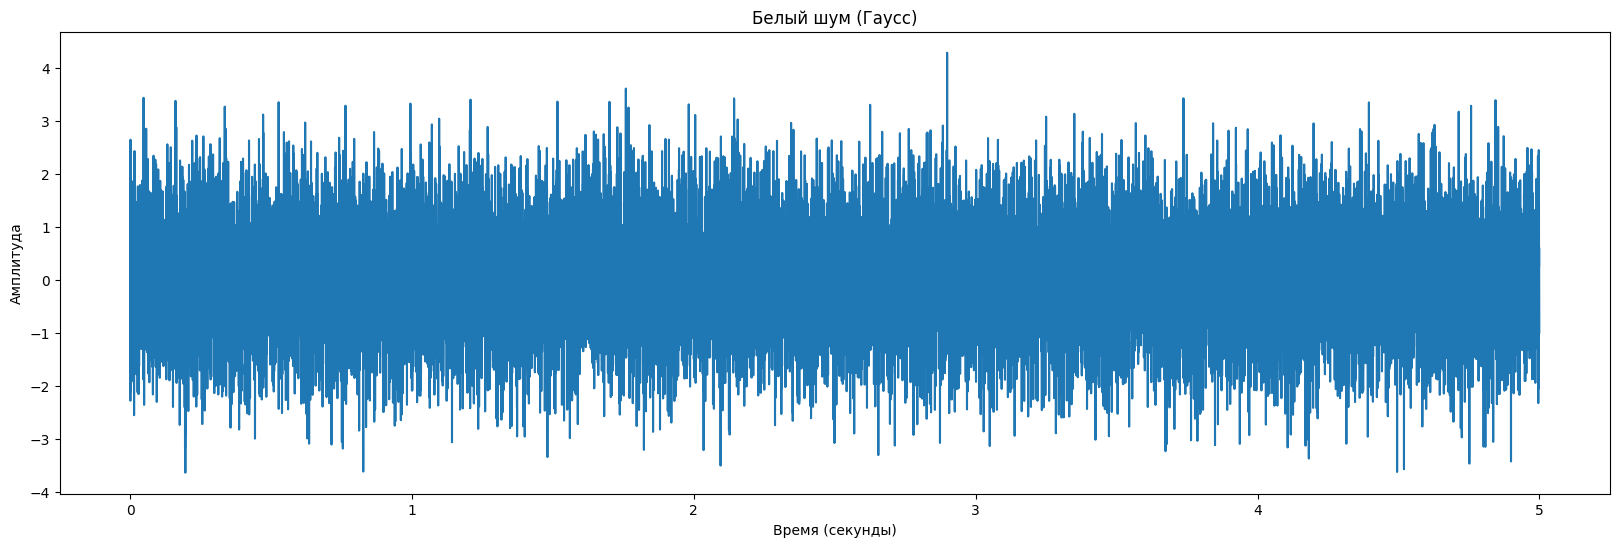

In [4]:
#Визуализация
time_axis = np.linspace(0, DURATION, len(white_noise_gauss))

plt.figure(figsize=(20, 6))
plt.plot(time_axis, white_noise_gauss)

plt.title('Белый шум (Гаусс)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()


In [5]:
#Розовый шум
#Построение
fft = np.fft.rfft(white_noise_gauss)
freq = np.fft.rfftfreq(NUM_SAMPLES, 1.0 / NUM_SAMPLES) + 1
flicker_spectrum = 1 / np.sqrt(freq)

pink_noise = np.fft.irfft(fft * flicker_spectrum)

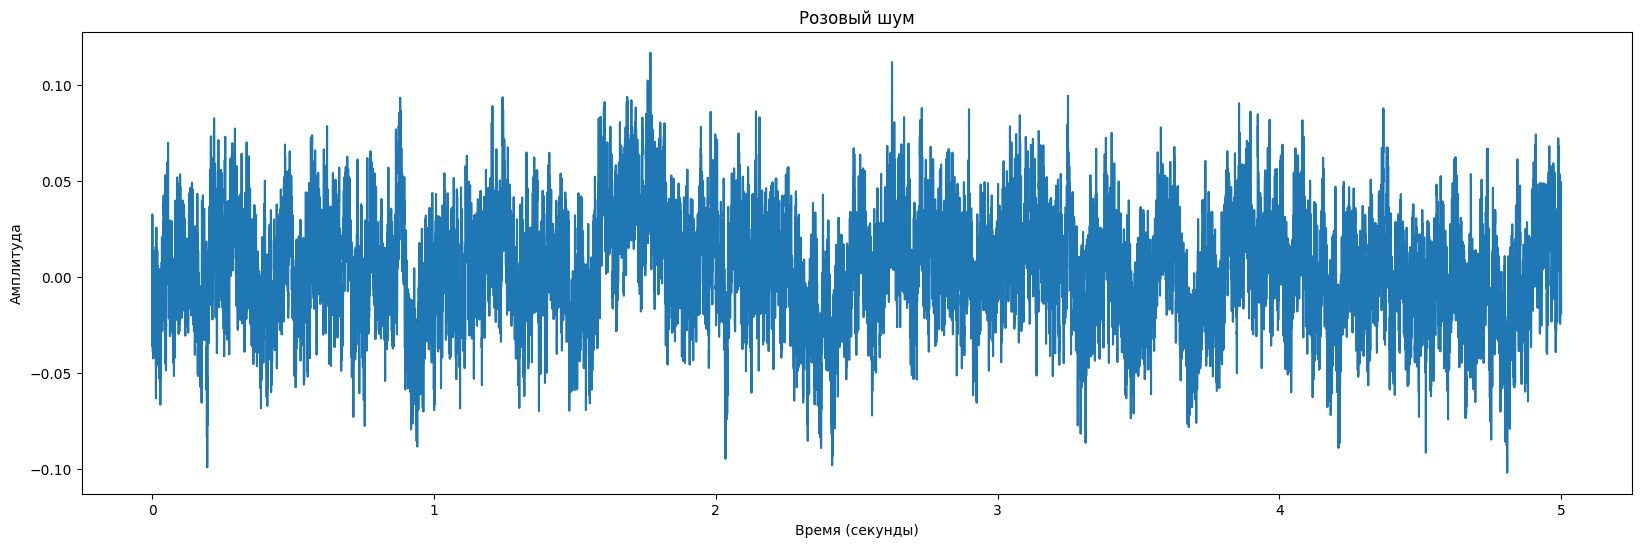

In [6]:
#Визуализация
time_axis = np.linspace(0, DURATION, len(pink_noise)) 

plt.figure(figsize=(20, 6))  

plt.plot(time_axis, pink_noise)
plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

In [7]:
#Чёрный шум
#Построение
def planck_law(frequency: float, temperature: float) -> float:
    kb = scipy.constants.Boltzmann
    h = scipy.constants.Planck
    c = scipy.constants.c

    c1 = 2 * h / c ** 2
    c2 = np.exp(h / kb)

    return c1 * frequency ** 3 / (c2 ** (frequency / temperature) - 1)

def equalizer_curve(
    frequency: float, temperature: float, amplification: float
) -> float:
    return (
        10 * np.log(planck_law(frequency, temperature) / temperature ** 3)
        + amplification
    )
T = 17 * 1e-9  # Температура в 17 нанокельвинов
F = 1000  # Частота дискретизации в Гц

BLACK_NUM_SAMPLES = DURATION * F  # Кол-во элементов в записи для чёрного шума
black_noise = np.random.normal(loc=0, scale=1, size=BLACK_NUM_SAMPLES) + equalizer_curve(F, T, 10)
black_noise /= np.max(np.abs(black_noise))

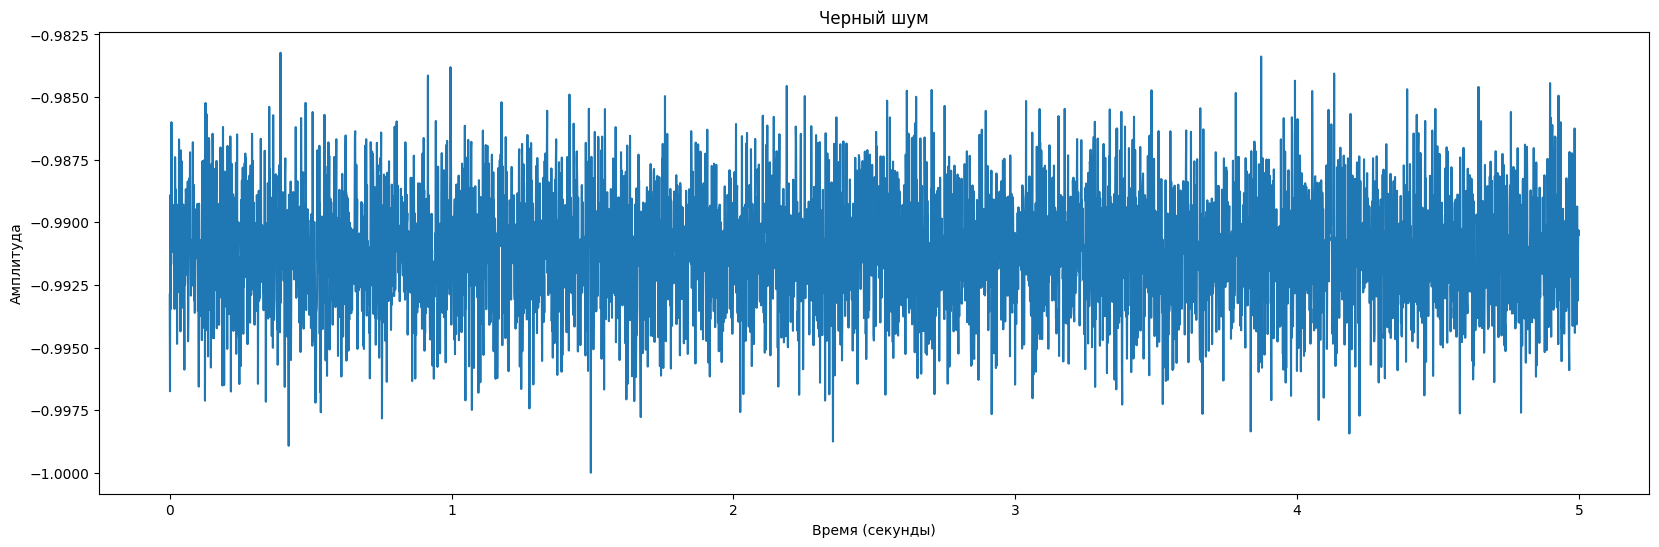

In [8]:
#Визуализация
time_axis = np.linspace(0, DURATION, len(black_noise))

plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)

plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

In [9]:
#Генерация временных рядов
#Построение

def weierstrass_function(x: float | np.ndarray) -> float | np.ndarray:
    a, b = np.float64(3), np.float64(0.5)
    return sum(b ** n * np.cos(a ** n * np.pi * x) for n in range(100))
x = np.linspace(0, DURATION, len(white_noise_gauss))

noiseless_signal = 2 * weierstrass_function(x) + np.sin(10 * x) + np.cos(50 * x)
time_series = noiseless_signal + white_noise_gauss

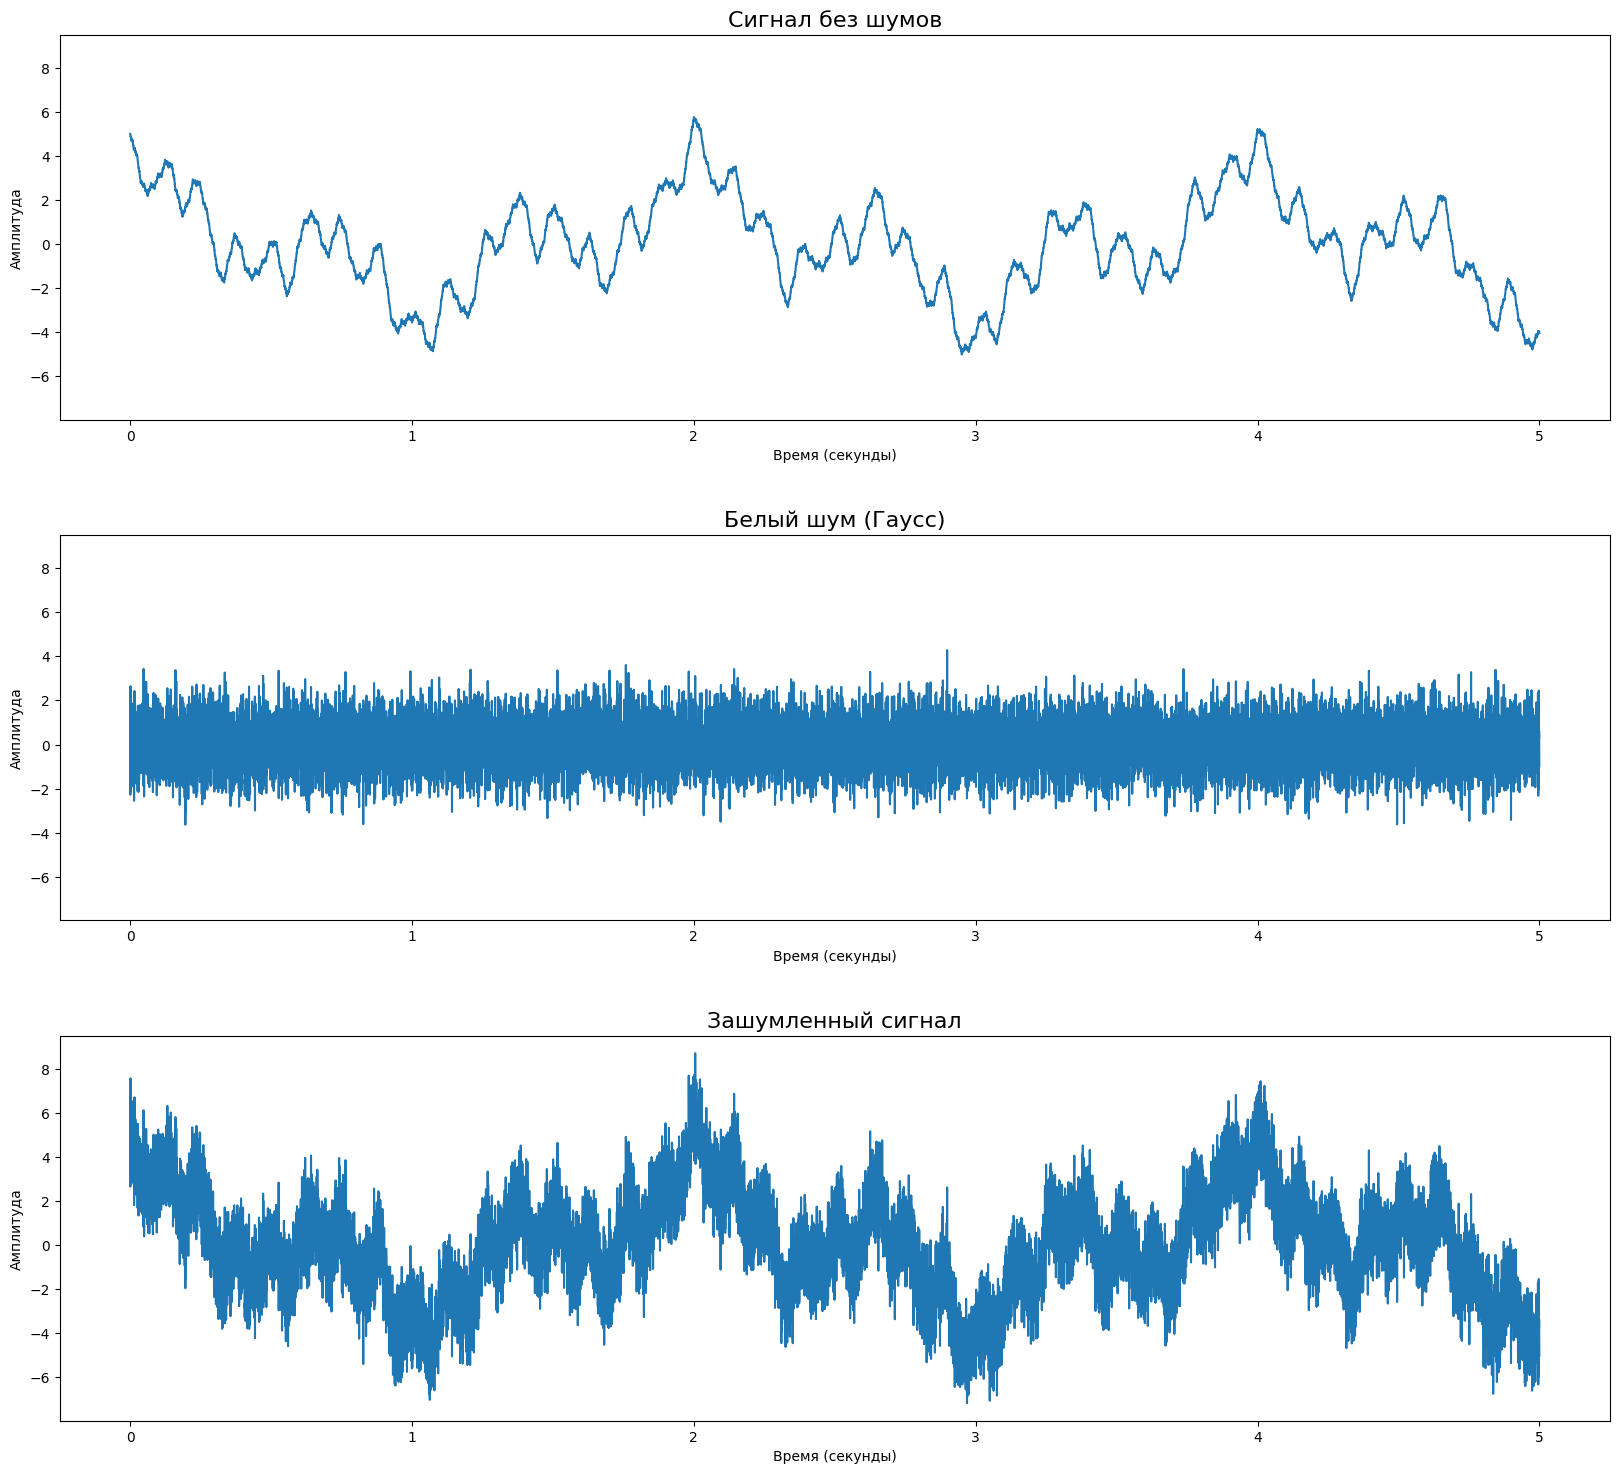

In [10]:
#Визуализация
time_axis = x

fig, ax = plt.subplots(3, 1, figsize=(20, 18), sharey=True)

SIGNALS = {
    'Сигнал без шумов': noiseless_signal,
    'Белый шум (Гаусс)': white_noise_gauss,
    'Зашумленный сигнал': time_series,
}

for i, name in enumerate(SIGNALS):
    ax[i].plot(time_axis, SIGNALS[name])
    ax[i].set_title(name, fontsize=16)
    ax[i].set_xlabel('Время (секунды)')
    ax[i].set_ylabel('Амплитуда')

plt.subplots_adjust(hspace=0.3)
plt.show()

In [11]:
#Проигрывание сигналов
def play_audio(noise: np.ndarray, freq: float) -> None:
    sd.play(noise / np.max(np.abs(noise)), freq)
    sd.wait()

In [12]:
play_audio(white_noise_gauss, SAMPLE_RATE)
play_audio(pink_noise, SAMPLE_RATE)
play_audio(black_noise, F)
play_audio(time_series, SAMPLE_RATE)